# In the name of God 
<p><b>Author: </b>Mohammadreza Mirzaei</p>
<p><b>Github: </b>https://github.com/MohammadrezaMirzaei</p>
<p><b>LinkedIn: </b>https://www.linkedin.com/in/mohammad-reza-mirzaei/</p>
<p><b>Email: </b>mirzaeimohammadreza98@gmail.com</p>

### Analyze the spatial-temporal distribution of bikeshare trips

In [13]:
pip install folium

     ------------------------------------- 102.3/102.3 kB 65.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


#### Get Data

In [14]:
import pandas as pd
import folium

In [15]:
from folium.plugins import HeatMapWithTime

In [16]:
df = pd.read_csv("metro-trips-2022-q3.csv")
df

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,197704064,21,7/1/2022 0:00,7/1/2022 0:21,4606,34.168629,-118.377068,4601,34.161709,-118.372818,19544,1,One Way,Walk-up,electric
1,197703662,2,7/1/2022 0:02,7/1/2022 0:04,4406,34.101891,-118.300613,4442,34.098000,-118.300468,24302,30,One Way,Monthly Pass,electric
2,197704062,3,7/1/2022 0:19,7/1/2022 0:22,3082,34.046520,-118.237411,3082,34.046520,-118.237411,19941,1,Round Trip,Walk-up,electric
3,197704162,2,7/1/2022 0:23,7/1/2022 0:25,3082,34.046520,-118.237411,3082,34.046520,-118.237411,17445,1,Round Trip,Walk-up,electric
4,197708062,39,7/1/2022 0:26,7/1/2022 1:05,3082,34.046520,-118.237411,3063,34.048038,-118.253738,19941,1,One Way,Walk-up,electric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85166,212443562,4,9/30/2022 23:36,9/30/2022 23:40,3042,34.049301,-118.238808,3022,34.046070,-118.233093,24053,30,One Way,Monthly Pass,electric
85167,212453772,45,9/30/2022 23:42,10/1/2022 0:27,4582,33.980991,-118.414879,4580,33.982922,-118.410927,13439,30,One Way,Monthly Pass,standard
85168,212443863,10,9/30/2022 23:49,9/30/2022 23:59,4410,34.063351,-118.296799,4410,34.063351,-118.296799,22800,30,Round Trip,Monthly Pass,electric
85169,212443862,5,9/30/2022 23:52,9/30/2022 23:57,4569,34.026550,-118.408463,4567,34.020180,-118.404030,22173,1,One Way,Walk-up,electric


In [123]:
df.start_time = pd.to_datetime(df.start_time, format='%m/%d/%Y %H:%M')
df['month'] = df.start_time.apply(lambda x: x.month)
df['week'] = df.start_time.apply(lambda x: x.week)
df['weekday'] = df.start_time.apply(lambda x: x.strftime('%A'))
df['day'] = df.start_time.apply(lambda x: x.day)
df['hour'] = df.start_time.apply(lambda x: x.hour)

In [124]:
df

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,...,plan_duration,trip_route_category,passholder_type,bike_type,month,week,day,hour,count,weekday
0,197704064,21,2022-07-01 00:00:00,7/1/2022 0:21,4606,34.168629,-118.377068,4601,34.161709,-118.372818,...,1,One Way,Walk-up,electric,7,26,1,0,1,Friday
1,197703662,2,2022-07-01 00:02:00,7/1/2022 0:04,4406,34.101891,-118.300613,4442,34.098000,-118.300468,...,30,One Way,Monthly Pass,electric,7,26,1,0,1,Friday
2,197704062,3,2022-07-01 00:19:00,7/1/2022 0:22,3082,34.046520,-118.237411,3082,34.046520,-118.237411,...,1,Round Trip,Walk-up,electric,7,26,1,0,1,Friday
3,197704162,2,2022-07-01 00:23:00,7/1/2022 0:25,3082,34.046520,-118.237411,3082,34.046520,-118.237411,...,1,Round Trip,Walk-up,electric,7,26,1,0,1,Friday
4,197708062,39,2022-07-01 00:26:00,7/1/2022 1:05,3082,34.046520,-118.237411,3063,34.048038,-118.253738,...,1,One Way,Walk-up,electric,7,26,1,0,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85166,212443562,4,2022-09-30 23:36:00,9/30/2022 23:40,3042,34.049301,-118.238808,3022,34.046070,-118.233093,...,30,One Way,Monthly Pass,electric,9,39,30,23,1,Friday
85167,212453772,45,2022-09-30 23:42:00,10/1/2022 0:27,4582,33.980991,-118.414879,4580,33.982922,-118.410927,...,30,One Way,Monthly Pass,standard,9,39,30,23,1,Friday
85168,212443863,10,2022-09-30 23:49:00,9/30/2022 23:59,4410,34.063351,-118.296799,4410,34.063351,-118.296799,...,30,Round Trip,Monthly Pass,electric,9,39,30,23,1,Friday
85169,212443862,5,2022-09-30 23:52:00,9/30/2022 23:57,4569,34.026550,-118.408463,4567,34.020180,-118.404030,...,1,One Way,Walk-up,electric,9,39,30,23,1,Friday


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85171 entries, 0 to 85170
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   trip_id              85171 non-null  int64         
 1   duration             85171 non-null  int64         
 2   start_time           85171 non-null  datetime64[ns]
 3   end_time             85171 non-null  object        
 4   start_station        85171 non-null  int64         
 5   start_lat            85165 non-null  float64       
 6   start_lon            85165 non-null  float64       
 7   end_station          85171 non-null  int64         
 8   end_lat              83461 non-null  float64       
 9   end_lon              83461 non-null  float64       
 10  bike_id              85171 non-null  int64         
 11  plan_duration        85171 non-null  int64         
 12  trip_route_category  85171 non-null  object        
 13  passholder_type      85171 non-

In [24]:
def generateBaseMap(default_location=[34.032587, -118.350081], default_zoom_start=11):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [25]:
base_map = generateBaseMap()
base_map

In [23]:
from folium.plugins import HeatMap

In [45]:
grid_agg = df.groupby(['start_lat', 'start_lon'])['start_station'].count().reset_index()
base_map = generateBaseMap()
mapss = HeatMap(data=grid_agg.values.tolist(), radius=20, max_zoom=11).add_to(base_map)
base_map

In [ ]:
base_map.add_child(folium.ClickForMarker(popup='Potential Location'))

In [ ]:
from folium.plugins import HeatMapWithTime

In [36]:
df['count'] = 1
df_hour_list = []
for hour in df.hour.sort_values().unique():
    df_hour_list.append(df.loc[df.hour == hour, ['start_lat', 'start_lon', 'count']].groupby(['start_lat', 'start_lon']).sum().reset_index().values.tolist())

In [47]:
base_map = generateBaseMap(default_zoom_start=11)
HeatMapWithTime(df_hour_list, radius=25, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
base_map

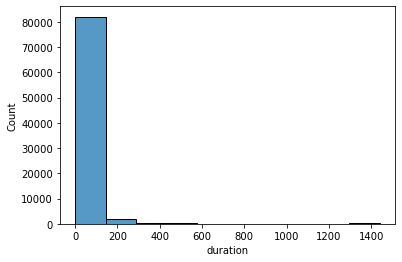

In [81]:
from matplotlib import pyplot as plt
import seaborn as sns    
# fig, ax = plt.subplots(figsize=(16, 15), dpi=100)
p = sns.histplot(df, x="duration", bins=10)


In [73]:
df1 = df.sort_values(by=['duration'], ascending=False)
df1[df1['duration'] >=200]

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,month,week,day,hour,count
9721,199167293,400,2022-07-12 12:33:00,7/12/2022 19:13,4210,33.984341,-118.471550,4211,33.984928,-118.469963,13539,1,One Way,One Day Pass,standard,7,28,12,12,1
61578,207245774,400,2022-09-08 11:13:00,9/8/2022 17:53,3081,34.031891,-118.250183,3081,34.031891,-118.250183,13892,1,Round Trip,One Day Pass,standard,9,36,8,11,1
15629,200017124,399,2022-07-19 11:51:00,7/19/2022 18:30,4216,34.023392,-118.479637,4216,34.023392,-118.479637,19544,1,Round Trip,Walk-up,electric,7,29,19,11,1
70118,209190359,398,2022-09-17 11:52:00,9/17/2022 18:30,4202,33.991161,-118.468292,4204,33.988419,-118.451630,24240,1,One Way,One Day Pass,electric,9,37,17,11,1
9722,199167291,398,2022-07-12 12:34:00,7/12/2022 19:12,4210,33.984341,-118.471550,4211,33.984928,-118.469963,13646,1,One Way,One Day Pass,standard,7,28,12,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66139,208231962,1,2022-09-13 15:27:00,9/13/2022 15:28,4202,33.991161,-118.468292,4202,33.991161,-118.468292,13629,30,Round Trip,Monthly Pass,standard,9,37,13,15,1
43560,203787162,1,2022-08-19 15:51:00,8/19/2022 15:52,4204,33.988419,-118.451630,4204,33.988419,-118.451630,23684,1,Round Trip,One Day Pass,electric,8,33,19,15,1
43554,203787062,1,2022-08-19 15:47:00,8/19/2022 15:48,3064,34.046131,-118.257591,3064,34.046131,-118.257591,23734,30,Round Trip,Monthly Pass,electric,8,33,19,15,1
43552,203787063,1,2022-08-19 15:46:00,8/19/2022 15:47,4483,34.100700,-118.259117,4483,34.100700,-118.259117,16065,1,Round Trip,One Day Pass,standard,8,33,19,15,1


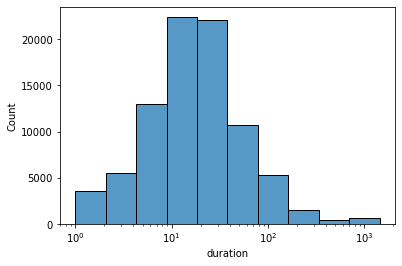

In [97]:
p = sns.histplot(df1, x="duration", bins=10, log_scale=True)


,hour,count
0,0,755
1,1,517
2,2,382
3,3,172
4,4,239
5,5,371
6,6,842
7,7,1972
8,8,3246
9,9,4095


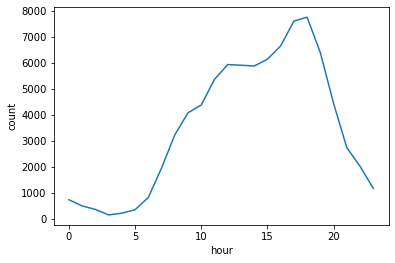

In [133]:
data_hourly = df.groupby(['hour'])['count'].count().reset_index()
p = sns.lineplot(data=data_hourly, x="hour", y="count")
data_hourly

,hour,weekday,count
0,0,Friday,121
1,0,Monday,76
2,0,Saturday,165
3,0,Sunday,188
4,0,Thursday,84
...,...,...,...
163,23,Saturday,222
164,23,Sunday,170
165,23,Thursday,175
166,23,Tuesday,144


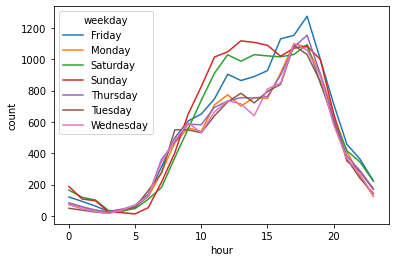

In [134]:
data_weekday = df.groupby(['hour','weekday'])['count'].count().reset_index()
sns.lineplot(data=data_weekday, x="hour", y="count", hue='weekday')
data_weekday

,weekday,count
0,Friday,13266
1,Monday,11364
2,Saturday,13022
3,Sunday,13601
4,Thursday,11637
5,Tuesday,11118
6,Wednesday,11163


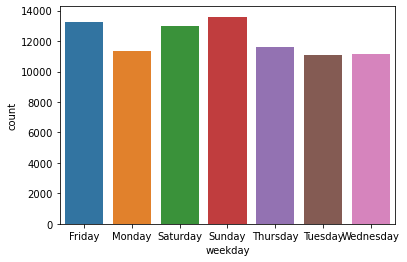

In [138]:
data_weekly = df.groupby(['weekday'])['count'].count().reset_index()
p = sns.barplot(data=data_weekly, x="weekday", y="count")
data_weekly

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,...,plan_duration,trip_route_category,passholder_type,bike_type,month,week,day,hour,count,weekday
start_time,,,,,,,,,,,,,,,,,,,,,
2022-07-01,893,893,893,893,893,893,893,893,871,871,...,893,893,893,893,893,893,893,893,893,893
2022-07-02,727,727,727,727,727,727,727,727,701,701,...,727,727,727,727,727,727,727,727,727,727
2022-07-03,890,890,890,890,890,890,890,890,867,867,...,890,890,890,890,890,890,890,890,890,890
2022-07-04,1040,1040,1040,1040,1040,1040,1040,1040,1025,1025,...,1040,1040,1040,1040,1040,1040,1040,1040,1040,1040
2022-07-05,775,775,775,775,775,775,775,775,762,762,...,775,775,775,775,775,775,775,775,775,775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,1065,1065,1065,1065,1065,1065,1065,1065,1049,1049,...,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065
2022-09-27,1007,1007,1007,1007,1007,1007,1007,1007,990,990,...,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007
2022-09-28,1000,1000,1000,1000,1000,1000,1000,1000,989,989,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


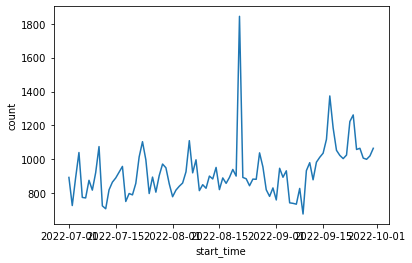

In [170]:

data_daily = df.groupby(by=df['start_time'].dt.date).count()
# data_daily['weekday'] = data_daily.index.to_series().apply(lambda x: x.strftime('%A'))

p = sns.lineplot(data=data_daily, x=data_daily.index, y=data_daily['count'])
data_daily